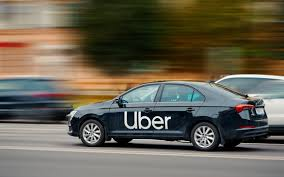

In [1]:
from IPython.display import Image,display
img = r"C:\Users\bhusa\Downloads\uberimage.jpeg"
display(Image(filename=img))

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load DataSet

In [3]:
data = pd.read_csv("C:\\Users\\bhusa\\Downloads\\UberDataset.csv")
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data.shape

(1156, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

#### *As we see that there are many null values in PURPOSE column Replacing the Null value with NOT*

In [6]:
data ['PURPOSE'].fillna('NOT', inplace=True)

In [7]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### *Replacing the START_DATE and END_DATE into Dateformat*

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

In [9]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


#### *Splitting the START_DATE to date and time column* 

In [11]:
from datetime import datetime
data['Date'] = pd.DatetimeIndex(data['START_DATE']).date
data['Time'] = pd.DatetimeIndex(data['START_DATE']).hour

In [12]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


#### *Now converting the time into four different categories i.e Morning, Afternoon, Evening, Night*

In [13]:
data['DAY_OR_NIGHT']  = pd.cut(x = data['Time'], bins = [0,10,15,19,24], labels =['Morning','Afternoon','Evening','Night'])

In [14]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DAY_OR_NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


### *Now droping the null values and Duplicates.*

In [20]:
data.dropna(inplace = True)

In [21]:
data.drop_duplicates(inplace=True)

# Data Visualization

#### *Checking the unique values in dataset of the columns with object datatype*

In [26]:
obj = (data.dtypes=='object')
obj_cols = list(obj[obj].index)

unique_values = {}
for col in obj_cols:
    unique_values[col]=data[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'Date': 113}

### *Now by using matplotlib and seaborn for countplot the CATEGORY and PURPOSE columns.*

<Axes: xlabel='count', ylabel='CATEGORY'>

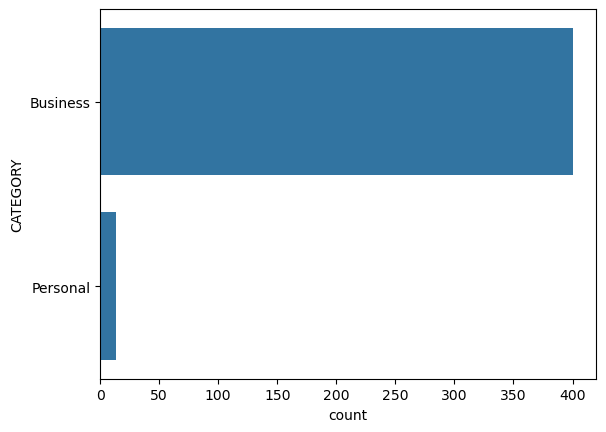

In [50]:
sns.countplot(data['CATEGORY'])


#### **from the above count plot we see that most of the people are use uber for Buiness purpose**

<Axes: xlabel='count', ylabel='PURPOSE'>

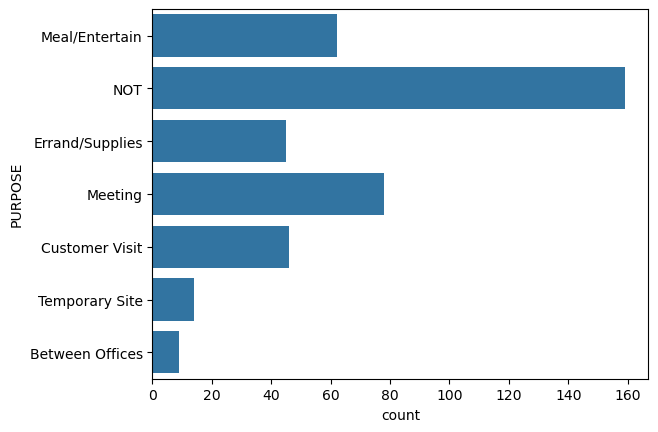

In [51]:
sns.countplot(data['PURPOSE'])

<Axes: xlabel='count', ylabel='DAY_OR_NIGHT'>

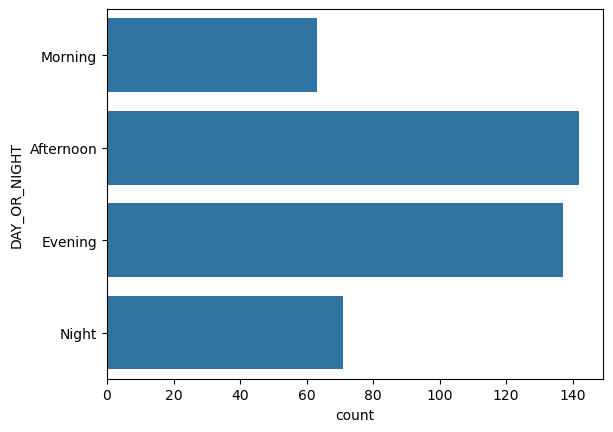

In [54]:
sns.countplot(data['DAY_OR_NIGHT'])

### *Now comparing the two different categories along with the PURPOSE of the user.*

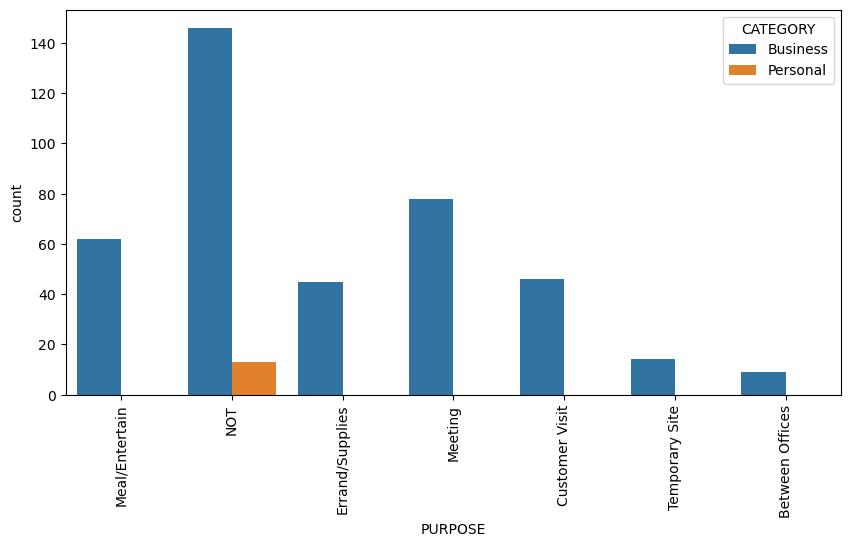

In [61]:
plt.figure(figsize=(10,5))

sns.countplot(data = data, x = 'PURPOSE', hue = 'CATEGORY')
plt.xticks(rotation=90)
plt.show()

### *INSIGHTS FROM THE ABOVE COUNT-PLOT*
**1.Most of the rides are booked for business purpose.**

**2.Most of the people book cabs for Meetings and Meal/Entertain Purpose.**

**3.Most of the cabs are booked in the time duration of 10pm-5pm (Afternoon).**


### *Now finding the corre;ation between the columns using heatmap*

<Axes: >

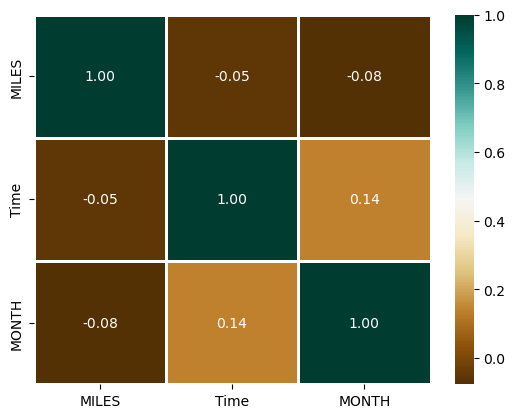

In [85]:
sns.heatmap(num_data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True )

### *Now visualize the month and value_count data*

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

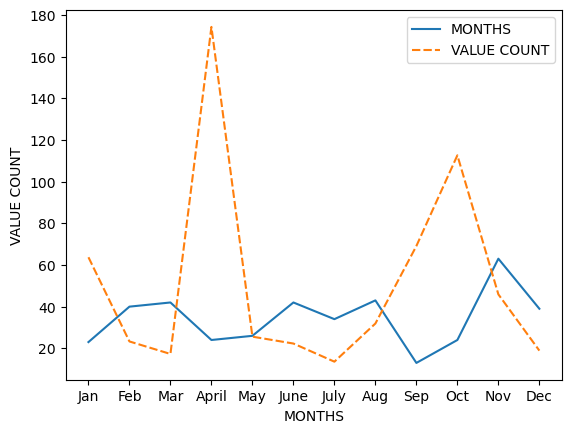

In [86]:
data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH"] = data.MONTH.map(month_label)

mon = data.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": data.groupby('MONTH', sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

### *INSIGHTS FROM THE ABOVE PLOT*
**1.The counts are very irregular.**

**2.Still its very clear that the counts are very less during Nov, Dec, Jan, which are in Florida, US.**

### *Visualization for days data.*

In [87]:
data['DAY']=data.START_DATE.dt.weekday
day_label = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thus', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DAY']=data['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

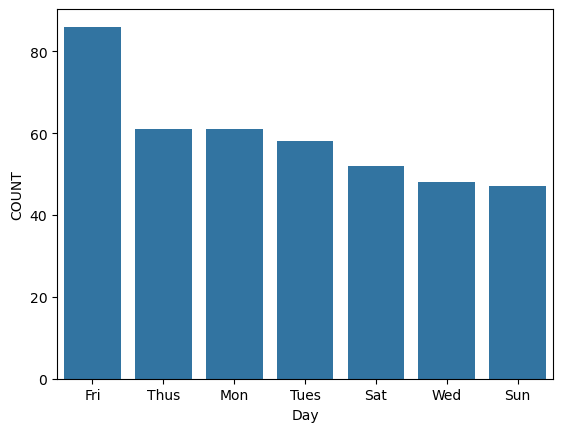

In [88]:
day_label = data.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('Day')
plt.ylabel('COUNT')

### *Now visualization of the MILES column by using boxplot to check the distribution of the column.*

<Axes: ylabel='MILES'>

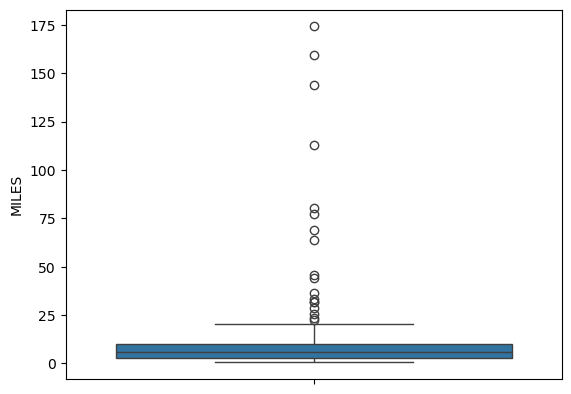

In [89]:
sns.boxplot(data['MILES'])

<Axes: ylabel='MILES'>

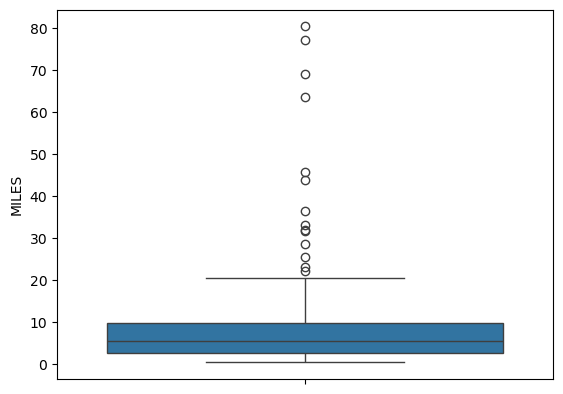

In [90]:
sns.boxplot(data[data['MILES']<100]['MILES'])

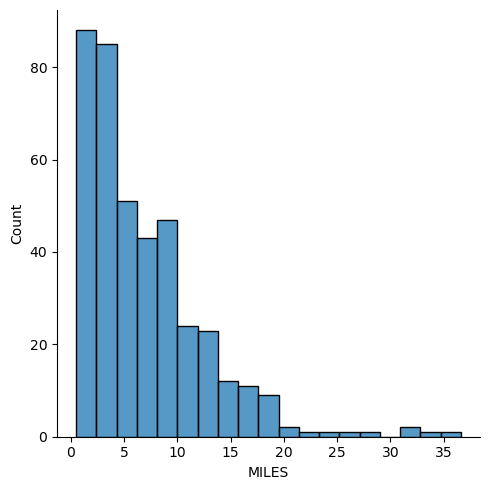

In [93]:
sns.displot(data[data['MILES']<40]['MILES'])

### *INSIGHTS FROM THE ABOVE PLOT*
**1. Most of the cabs booked for the distance of 4-5 miles.**

**2. Majorly people chooses cabs for the distance of 0-20 miles.**

**3. For distance more than 20 miles cab counts is nearly negligible.**
